In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
from astropy.time import Time

In [2]:
# from tess_stars2px import TESS_Spacecraft_Pointing_Data
# sector = 14
# camera = 1
# ccd = 1
# col = 0
# row = 0 
# scinfo = TESS_Spacecraft_Pointing_Data(14)
# ra, dec = scinfo.fpgObjs[0].pix2radec_nocheck_single(camera - 1, ccd - 1, [col-45.0, row-1.0])

# Also! TESSpoint reference code:

# from tess_stars2px import tess_stars2px_function_entry as tess_stars2px
# ra,dec = 226.337147,36.786975
# sectors = tess_stars2px(8675309, ra, dec)[3]
# ^Note: The 867 number is any integer (technically a TIC ID but the code does not use it). You can provide an ra/dec and it should give you a list of sectors but also cameras/ccds if you are interested

# Output:
# return outID, outEclipLong, outEclipLat, outSec, outCam, outCcd, \


In [2]:
from tess_stars2px import TESS_Spacecraft_Pointing_Data
from tess_stars2px import tess_stars2px_function_entry as tess_stars2px

In [95]:
# Read csvs
df = pd.read_csv('./target_df_longform.csv')
tdf = pd.read_csv('./target_df_shortform.csv')
df = df.drop(columns=df.columns[0])
tdf = tdf.drop(columns=tdf.columns[0])

# also fix the sec columns to that it isn't a string for some reason
from ast import literal_eval    
tdf["sec"] = tdf["sec"].apply(lambda x: literal_eval(x))

In [4]:
# ingest positions catalog
cat = pd.read_csv('CTLv8 (current).csv')
cat.rename(columns={'Right_Ascension':'ra', 'Declination':'dec', "TESSmag":'Tmag', 'Ecliptic_Longitude':'ec_long', 'Ecliptic_Latitude':'ec_lat', 'TIC_ID':'TIC'}, inplace=True)
cat[:5]


,ra,dec,Tmag,ec_long,ec_lat,TIC,Unnamed: 6
0,220.232448,-26.428675,6.91390,225.990733,-10.269982,42969,NaN
1,221.501740,-25.444850,6.52400,226.788813,-8.984815,82063,NaN
2,221.499632,-25.443643,4.83310,226.786607,-8.984237,82066,NaN
3,219.920773,-26.723852,6.52330,225.814106,-10.636939,34920,NaN
4,220.806357,-24.997792,5.70412,226.044917,-8.749483,58487,NaN


# Spherical Coord Code

In [4]:
out = np.meshgrid(th, phi)
np.shape(out[0])
Th, Phi = out[0], out[1]
Th

NameError: name 'th' is not defined

In [37]:
Th

2

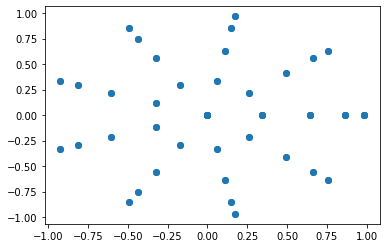

In [39]:
# generate uniform distr of points?
n = 10
r = np.ones(n)
th = np.linspace(0, np.pi, n)
phi = np.linspace(0, 2*np.pi, n)

out = np.meshgrid(th, phi)
Th, Phi = out[0], out[1]

x = np.sin(Th) * np.cos(Phi)
y = np.sin(Th) * np.sin(Phi)
# z = r * cos(th)


plt.scatter(x, y)


In [5]:
# generate uniform distr of points?
n = 5000
r = 1
# generateRandom = True
# generateFixed = True

def generateRandom(n, r=1):
    print("Generating randomly %d points on a sphere centered at the origin" % (n))
    theta = np.random.uniform(0.0,2*np.pi,n)
    z = np.random.uniform(-1.0,1.0,n)
    for i in range (0,n):
        zp = z[i]
        xp = np.sqrt(r*r - zp*zp)* np.cos(theta[i])
        yp = np.sqrt(r*r - zp*zp)* np.sin(theta[i])
    return xp, yp, zp

def generateFixed(n, r=1):
    # print("Generating fixed %d points on a sphere centered at the origin" % (n))
    alpha = 4.0*np.pi*r*r/n
    d = np.sqrt(alpha)
    m_nu = int(np.round(np.pi/d))
    d_nu = np.pi/m_nu
    d_phi = alpha/d_nu

    z = np.ones(n)

    for m in range (0,m_nu):
        nu = np.pi*(m+0.5)/m_nu
        m_phi = int(np.round(2*np.pi*np.sin(nu)/d_phi))
        for n in range (0,m_phi):
            phi = 2*np.pi*n/m_phi
            xp = r*np.sin(nu)*np.cos(phi)
            yp = r*np.sin(nu)*np.sin(phi)
            zp = r*np.cos(nu)
    return xp, yp, zp

xp, yp, zp = generateFixed(500)

In [11]:
np.ones(3)

array([1., 1., 1.])

In [10]:
n = 50
alpha = 4.0*np.pi*r*r/n
d = np.sqrt(alpha)
m_nu = int(np.round(np.pi/d))
d_nu = np.pi/m_nu
d_phi = alpha/d_nu
count = 0

m_nu
# for m in range (0,m_nu):
#     nu = np.pi*(m+0.5)/m_nu
#     m_phi = int(np.round(2*np.pi*np.sin(nu)/d_phi))
#     for n in range (0,m_phi):
#         phi = 2*np.pi*n/m_phi
#         xp = r*np.sin(nu)*np.cos(phi)
#         yp = r*np.sin(nu)*np.sin(phi)
#         zp = r*np.cos(nu)
#         count = count +1

6

# Scheduling Code

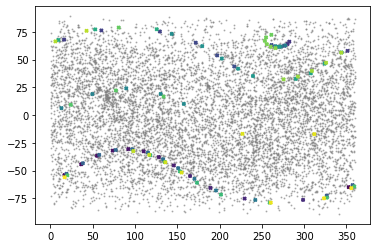

In [5]:
# for a given period, observed in one sector per mission, how many orbits do you catch?
per = 50  # in days
sectors = [1, 13]

scinfo = TESS_Spacecraft_Pointing_Data(1)
# ra, dec = scinfo.fpgObjs[0].pix2radec_nocheck_single(camera - 1, ccd - 1, [col-45.0, row-1.0])
# scinfo.fpgObjs[0]
scinfo.midtimes

plt.scatter(cat.ra, cat.dec, s=1, alpha=.5, color='grey')
plt.scatter(TESS_Spacecraft_Pointing_Data.ras, TESS_Spacecraft_Pointing_Data.decs, s=10, c=TESS_Spacecraft_Pointing_Data.midtimes, marker='X')



In [6]:
# Note: Midtimes really do seem to be the MIDDLE of the tess sector, so inclusive times for it will be +/- 13.5 days
# goes up to sector 96, which is the conclusion of Year 7 observing (mix of north/south + some ecliptic)
midtimes = TESS_Spacecraft_Pointing_Data.midtimes
sectors_all = TESS_Spacecraft_Pointing_Data.sectors
print(sectors_all[-10:])
print(midtimes[-10:])

[87 88 89 90 91 92 93 94 95 96]
[2460676.  2460703.5 2460732.  2460760.5 2460788.5 2460816.  2460842.5
 2460868.5 2460894.5 2460920.5]


In [7]:
ra = cat.ra[0]
dec = cat.dec[0]

# run one
outID, outEclipLong, outEclipLat, outSec, outCam, outCcd, outColPix, outRowPix, scinfo = \
    tess_stars2px(1111, ra, dec, scInfo=TESS_Spacecraft_Pointing_Data())

#run several!
j = 1
k = 10
arr = [1,60,700,400]
outID, outEclipLong, outEclipLat, outSec, outCam, outCcd, outColPix, outRowPix, scinfo = \
    tess_stars2px(cat.TIC[arr], cat.ra[arr], cat.dec[arr], scInfo=TESS_Spacecraft_Pointing_Data())

# scinfo
scinfo.sectors
outSec
outID

array([   82063,    82063,    82063,    82063, 40785206,  8462730,
        8462730,  8462730,  8462730,  4612575,  4612575,  4612575])

In [9]:
# testing
t = Time(midtimes[2], format='jd')
t.format = 'iso'
t.value

period = 147.6
tc_phase = .15
start_time=missionStart; stop_time=missionStop

print(missionStart, missionStop)

num = np.ceil((stop_time - start_time) / period)
np.arange(start_time + tc_phase*period, stop_time, period)
# transit_times = np.arange(np.ceil(stop_time/period))
# transit_times = (transit_times + tc_phase) * period
# print(transit_times - missionStart)


NameError: name 'missionStart' is not defined

In [224]:
# get mission parameters
# Note: Midtimes really do seem to be the MIDDLE of the tess sector, so inclusive times for it will be +/- 13.5 days
midtimes = TESS_Spacecraft_Pointing_Data.midtimes
sectors_all = TESS_Spacecraft_Pointing_Data.sectors
missionStart = midtimes[0] - 13.5
missionStop = midtimes[-1] + 13.5

# functions
def calc_transit_times_phase(period, tc_phase, dur=2, start_time=missionStart, stop_time=missionStop):
    """period - days
    tc_phase - the fractional phase that the transit occurs at
    duration - duration in hours
    """
    transit_times = np.arange(start_time + tc_phase*period, stop_time, period)
    return transit_times

def calc_transit_times_tc(period, tc, dur=2, start_time=missionStart, stop_time=missionStop):
    """period - days
    tc - one time that the transit occurs at (does not need to be the first)
    duration - duration in hours
    """
    # Calculate the first occurrence of the event time after the start time
    first_occurrence = start_time + ((tc - start_time) % period)
    transit_times = np.arange(first_occurrence, stop_time + 1, period)
    return transit_times

def generate_event_times(period, event_time, start_time, stop_time):
    # Calculate the first occurrence of the event time after the start time
    first_occurrence = start_time + ((tc - start_time) % period)
    
    # Generate subsequent event times using arange
    transit_times = np.arange(first_occurrence, stop_time + 1, period)
    
    return transit_times

def check_observability(transit_times, sector_times, verbose=False):
    trans_obs = [any(n - 13.5 <= transit_time < n + 13.5 for n in sector_times) for transit_time in transit_times]
    sec_obs = [any(n - 13.5 <= sector_time < n + 13.5 for n in transit_times) for sector_time in sector_times]

    # Just kidding, this part isn't true when a single sector contains more than one transit
    # # just check that both have the same number of "true" events
    if sum(trans_obs) != sum(sec_obs) and verbose:
        # print('Something is wrong with observability calculation.')
        print('Period solved. Multiple transits in one sector observed.')
    return np.array(trans_obs), np.array(sec_obs)

def find_all_aliases(transit_times, sector_times, trans_obs, sec_obs, min_period=13):
    if sum(trans_obs) == 1:
        print("Mono-transit")
        return [], []
    elif sum(trans_obs) == 0:
        print("No transits detected")
        return [], []

    # the maximum possible period is the difference between the two most closely spaced observed transits
    data = transit_times[trans_obs]
    max_alias = np.min(data[1:] - data[:-1])

    # the minimum possible alias should 27 d, but I'll do 20 to be safe
    # in the future, I may add something to remove aliases that are needlessly close to each other, but we'll see if it's necessary
    min_n = np.ceil(max_alias / min_period)
    n_a = np.arange(1, min_n)
    aliases = max_alias / n_a
    return n_a, aliases

In [216]:
def check_event_within_period(period, event_time, secondary_times):
    """Returns True if the period would result in a transit taking place during the sector specified by that secondary_time."""
    result = [False] * len(secondary_times)  # Initialize result array with False values
    
    for i, secondary_time in enumerate(secondary_times):
        time_diff = (secondary_time - event_time) % period
        if time_diff <= 13.5 or time_diff >= period - 13.5:
            result[i] = True  # Update the value in the result array
        
    return result

def rule_out_aliases(periods, event_time, secondary_times):
    """For a list of alias periods, returns True if that period would result in a transit taking place during ANY sector specified by the secondary_times.
    
    Inputs:
        periods - a float or list of possible periods
        event_time - a time at which a transit was observed
        secondary_times - the midpoints of sectors in which transits were NOT observed
    
    Returns: arr[bool] where True means that that alias can be ruled out.
    """
    if isinstance(periods, np.ndarray):
        periods = periods.tolist()
    if not isinstance(periods, list):
        periods = [periods]  # Convert to list if a single value is provided
    results = [False] * len(periods)  # Initialize result array with False values
    
    for i, period in enumerate(periods):
        for secondary_time in secondary_times:
            time_diff = (secondary_time - event_time) % period
            if time_diff <= 13.5 or time_diff >= period - 13.5:
                results[i] = True 
                break  # No need to continue checking for this period
    return np.array(results)

# # Example usage:
# period = 50  # assuming the period is 24 hours
# event_time = 9.0  # time of the event
# secondary_times = [28.0, 100.0, 122.5]  # secondary times

# # ruled_out = check_event_within_period(period, event_time, secondary_times)
# ruled_out = rule_out_aliases(np.array([50,80,200]), event_time, secondary_times)
# print(ruled_out)


In [12]:
# When we do the big run
# for each star position in the catalog
# for each period from 20 to (upper limit? 2000?)
# for each time of conjuction, on a grid of times
#   calculate the completion (i.e. % of solved periods, % of monotransits, % of unresolved duo transits)

print(missionStop - missionStart)

2607.847221999895


In [131]:
# # make df with all sector info (takes a few minutes to run)
# # exploratory plot of how many times each point on the sky gets hit
# # inds = random.sample(range(len(cat)), 1000)
# inds = range(len(cat))
# ra_arr = cat.ra[inds].values
# dec_arr = cat.dec[inds].values
# tic_arr = cat.TIC[inds].values

# outID, outEclipLong, outEclipLat, outSec, _, _, _, _, scinfo = \
#     tess_stars2px(tic_arr, ra_arr, dec_arr, scInfo=TESS_Spacecraft_Pointing_Data())

# df = pd.DataFrame({'TIC':outID, 'sec':outSec, 'ec_long':outEclipLong, 'ec_lat':outEclipLat})
# df['num_s'] = df.groupby(['TIC'])['sec'].transform('count')

# # aggregate to have one line per star
# tdf = df.drop_duplicates(subset='TIC')
# s = df.groupby('TIC')['sec'].agg(lambda x: x.unique().tolist())
# tdf = tdf.merge(s, on='TIC')
# tdf = tdf.drop(columns=['sec_x']).rename(columns={'sec_y':'sec'})
# tdf[:5]

,TIC,ec_long,ec_lat,num_s,sec
0,42969,225.986851,-10.269982,3,"[38, 65, 91]"
1,82063,226.784931,-8.984814,4,"[11, 38, 65, 91]"
2,82066,226.782725,-8.984237,4,"[11, 38, 65, 91]"
3,34920,225.810224,-10.636939,3,"[38, 65, 91]"
4,58487,226.041035,-8.749482,3,"[38, 65, 91]"


In [280]:
# # save the df and tdf
# df.to_csv('./target_df_longform.csv')
# tdf.to_csv('./target_df_shortform.csv')


In [61]:
print(len(df), len(new))

42764 8156


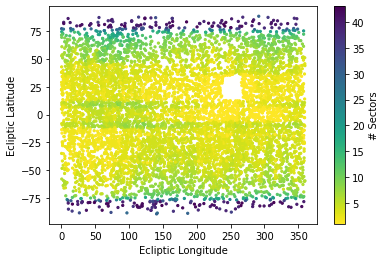

In [15]:
plt.scatter(tdf.ec_long, tdf.ec_lat, c=tdf.num_s, cmap='viridis_r', s=5)
plt.xlabel('Ecliptic Longitude')
plt.ylabel('Ecliptic Latitude')
# plt.title('TESS Sky Coverage')
plt.colorbar(label='# Sectors')
plt.show()

In [122]:
mini.iloc[k].TIC

cat[cat.TIC==mini.iloc[k].TIC].index.values[0]

6860

[24 50 51 77 78]
Something is wrong with observability calculation.


Text(0.5, 0, 'JD')

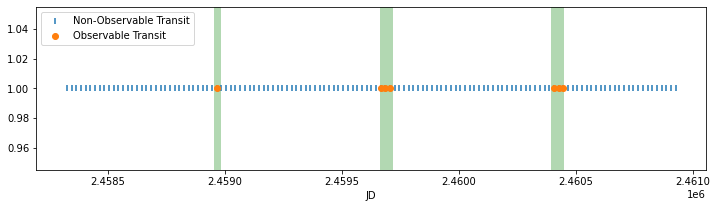

In [123]:
# define your planet
# ind = 2302
# period = 45
# tc = 0 + missionStart

ind = cat[cat.TIC==mini.iloc[k].TIC].index.values[0]
period = 20
tc_phase = 0
tic = cat.TIC[ind]
ra = cat.ra[ind]
dec = cat.dec[ind]
# ask tesspoint what sectors it is in
outID, outEclipLong, outEclipLat, outSec, outCam, outCcd, outColPix, outRowPix, scinfo = \
    tess_stars2px(tic, ra, dec, scInfo=TESS_Spacecraft_Pointing_Data())

# sector_times = np.array([0, 1, 7, 8, 13, 14]) * 27
sector_times = midtimes[outSec-1]     # sectors are indexed from 1, midtimes from -

print(outSec)
# print(sector_times)

# calculate transit times in the relevant window
transit_times = calc_transit_times_phase(period, tc_phase, dur=2)
trans_obs, sec_obs = check_observability(transit_times, sector_times)

# plot transits and sectors
fig, ax = plt.subplots(figsize=[12,3])
for ind in range(len(sector_times)):
    st = sector_times[ind]
    if ~sec_obs[ind]:
        plt.axvspan(st-13.5, st+13.5, alpha=0.3, color='red', linestyle='')
    else:
        plt.axvspan(st-13.5, st+13.5, alpha=0.3, color='green', linestyle='')
ax.scatter(transit_times, np.ones_like(transit_times), marker='|', label='Non-Observable Transit')
ax.scatter(transit_times[trans_obs], np.ones_like(transit_times[trans_obs]), label='Observable Transit')
ax.legend()
ax.set_xlabel('JD')



In [130]:
# find all the aliases
observed_transit = transit_times[trans_obs][0]
n_a, aliases = find_all_aliases(transit_times, sector_times, trans_obs, sec_obs)

if sum(trans_obs) > sum(sec_obs):
    print('Period solved. Two transits captured in single sector')
else:
    # see what is ruled out by the empty sectors
    ruled_out = rule_out_aliases(aliases, observed_transit, sector_times[~sec_obs])
    # ruled_out = rule_out_aliases(aliases, transit_times[trans_obs][0], [2458530.256944, 2458540.256944])

    # print the status
    if sum(aliases[~ruled_out]) > 1 :
        print("Still ambiguous!")
    elif sum(aliases[~ruled_out]) == 1 :
        print('Sovled!')
    else:
        print("Something went wrong")


    # see which aliases were ruled out
    plt.scatter(n_a, aliases, label='Not ruled out')
    plt.scatter(n_a[ruled_out], aliases[ruled_out], label='Ruled out')
    plt.yscale('log')
    plt.xlabel('Alias #')
    plt.ylabel('Alias Period')
    plt.legend()
    plt.show()




Period solved. Two transits captured in single sector


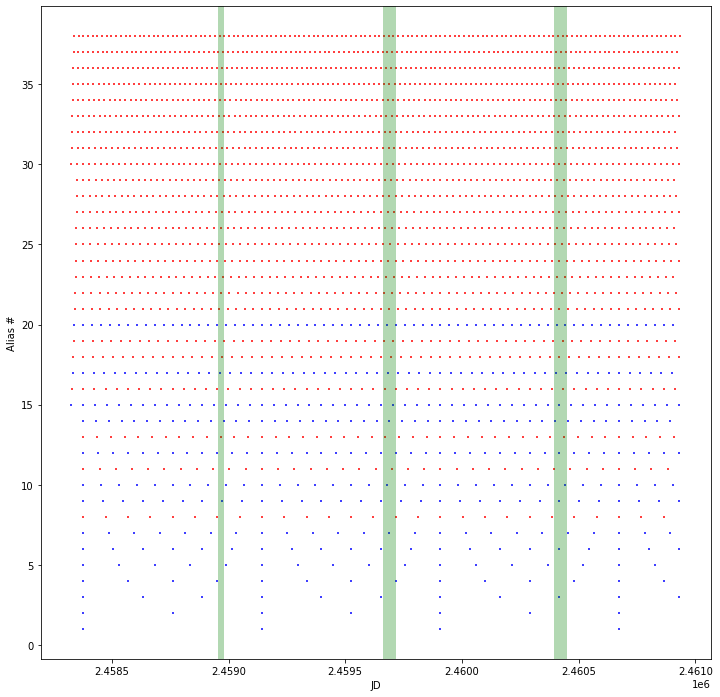

In [124]:
# plot all the alias transits in detail
plt.close('all')
plt.figure(figsize=[12,12])
for ind in range(len(aliases)):
    transits = calc_transit_times_tc(aliases[ind], observed_transit)
    if ruled_out[ind]:
        plt.scatter(transits, np.ones_like(transits)*n_a[ind], marker='|', s=3, c='red')
    else:
        plt.scatter(transits, np.ones_like(transits)*n_a[ind], marker='|', s=3, c='blue')

for ind in range(len(sector_times)):
    st = sector_times[ind]
    if ~sec_obs[ind]:
        plt.axvspan(st-13.5, st+13.5, alpha=0.3, color='red', linestyle='')
    else:
        plt.axvspan(st-13.5, st+13.5, alpha=0.3, color='green', linestyle='')

plt.xlabel('JD')
plt.ylabel('Alias #')    
plt.show()


/var/folders/kk/_9cq7r5j5nd8cxryt5p59v2c0000gn/T/ipykernel_79530/449271651.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


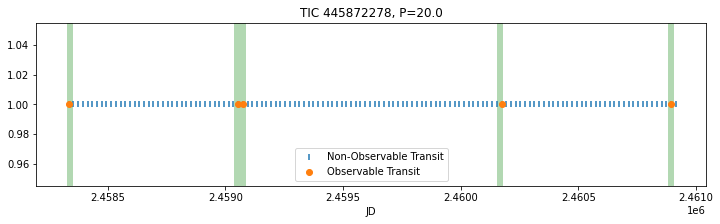

In [222]:
def plot_transits():
    plt.close('all')
    fig, ax = plt.subplots(figsize=[12,3])
    for ind in range(len(sector_times)):
        st = sector_times[ind]
        if ~sec_obs[ind]:
            plt.axvspan(st-13.5, st+13.5, alpha=0.3, color='red', linestyle='')
        else:
            plt.axvspan(st-13.5, st+13.5, alpha=0.3, color='green', linestyle='')
    ax.scatter(transit_times, np.ones_like(transit_times), marker='|', label='Non-Observable Transit')
    ax.scatter(transit_times[trans_obs], np.ones_like(transit_times[trans_obs]), label='Observable Transit')
    ax.legend()
    ax.set_xlabel('JD')
    ax.set_title('TIC ' + str(tic) + ', P=' + str(round(period, 2)))
    fig.show()

def plot_aliases():
    plt.close('all')
    plt.figure(figsize=[12,12])
    for ind in range(len(aliases)):
        transits = calc_transit_times_tc(aliases[ind], observed_transit)
        if ruled_out[ind]:
            plt.scatter(transits, np.ones_like(transits)*n_a[ind], marker='|', s=3, c='red')
        else:
            plt.scatter(transits, np.ones_like(transits)*n_a[ind], marker='|', s=3, c='blue')

    for ind in range(len(sector_times)):
        st = sector_times[ind]
        if ~sec_obs[ind]:
            plt.axvspan(st-13.5, st+13.5, alpha=0.3, color='red', linestyle='')
        else:
            plt.axvspan(st-13.5, st+13.5, alpha=0.3, color='green', linestyle='')

    plt.xlabel('JD')
    plt.ylabel('Alias #')  
    plt.title('TIC ' + str(tic) + ' P=' + str(round(period, 2)))  
    plt.show()

plot_transits()

## Making Observing Strategies

We will build an "extended extended mission" by assuming that futre sectors will reuse pointings from previous sectors. We build the mission by specifying the order that we want to repeat sectors, and then propagate their midtimes forward in time.

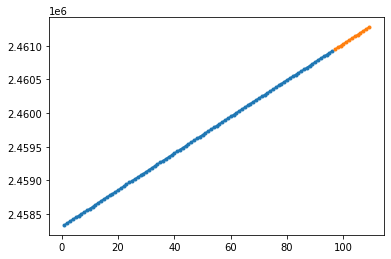

In [377]:
# midtimes = TESS_Spacecraft_Pointing_Data.midtimes
# sectors_all = TESS_Spacecraft_Pointing_Data.sectors
# plt.plot(midtimes[1:] - midtimes[:-1])
# plt.plot(sectors_all[-30:], midtimes[-30:], marker='.')

# average time between sector midtimes
sec_cadence = np.mean(midtimes[1:] - midtimes[:-1])

# Assume that the extended mission will reuse pointings from previous sectors
# repeat just year 1 and 2 as is
new_secs = sectors_all[:26]
new_midtimes = midtimes[-1] + sec_cadence * (1 + np.arange(len(new_secs)))

# here is a strategy that observes the north first and the south second
flip_secs = np.hstack([sectors_all[13:26], sectors_all[:13]])


# # plot to check that the times line up properly
# plt.plot(sectors_all, midtimes, marker='.')
# plt.plot(new_secs + sectors_all[-1], new_midtimes, marker='.')



## Scaling up

# of Single Sector Targets:  787


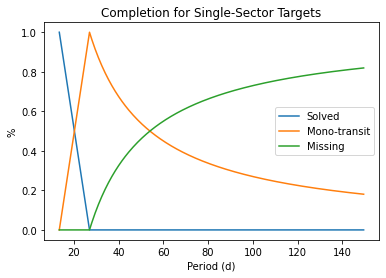

In [19]:
# completion rates for single sector targets are analytical
print("# of Single Sector Targets: ", len(tdf[tdf.num_s==1]))

def completion_for_single_sectors(periods):
    if isinstance(periods, (float, int)):
        periods = [periods]
    solved = [np.nan] * len(periods)
    mono = [np.nan] * len(periods)
    missing = [np.nan] * len(periods)
    
    for ind in range(len(periods)):
        p = periods[ind]
        if 13.5 <= p and p < 27:
            solved[ind] = (27-p)/27 * 2
            mono[ind] = (2*p-27)/27
            missing[ind] = 0
        elif p >= 27:
            solved[ind] = 0
            mono[ind] = 1 - (p-27)/p
            missing[ind] = (p-27)/p
        else:
            solved[ind] = np.nan
            mono[ind] = np.nan
            missing[ind] = np.nan          
            # print('Period too short')
            # return [np.nan, np.nan, np.nan]
    return np.array(solved), np.array(mono), np.array(missing)

# easy printing
if False:
    p = 26
    print("For P = [13,27)")
    print("Solved %", (27-p)/27 * 2)
    print("Mono %", (2*p-27)/27)
    print('')

    p = 27*2
    print("For P = [27,inf)")
    print("Missing %", (p-27)/p)
    print("Mono %", 1 - (p-27)/p)
    print('')

periods = np.arange(13.5, 150, .5)
solved, mono, missing = completion_for_single_sectors(periods)
ss_df = pd.DataFrame({'period':periods, 'solved':solved, 'mono':mono, 'missing':missing})

plt.plot(ss_df.period, ss_df.solved, label='Solved')
plt.plot(ss_df.period, ss_df.mono, label='Mono-transit')
plt.plot(ss_df.period, ss_df.missing, label='Missing')
plt.legend()
plt.xlabel('Period (d)')
plt.ylabel('%')
plt.title('Completion for Single-Sector Targets')
plt.show()


In [24]:
print(len(tdf[tdf.num_s==0]))
print(len(tdf[tdf.num_s==1]), len(ss_df))
print(len(tdf[tdf.num_s==2]))


0
787 273
1430


In [278]:
# sky plot of single sector stuff
# how are we defining "completion rate"?
completion_for_single_sectors(15)

(array([0.88888889]), array([0.11111111]), array([0]))

In [202]:
# play around with scaling up
np.random.seed(42)

# to do the big run, we can remove the single transit stars
tdf1 = tdf[tdf.num_s>1]

i2 = random.sample(range(len(tdf1)), 50)
mini = tdf1.iloc[i2]#.reset_index()
# tics = tdf1.iloc[i2]['TIC'].values

periods = 100*np.random.rand(4) + 10
tc_phases = np.random.rand(3)

print(periods)
mini[:5]

[ 47.45401188 105.07143064  83.19939418  69.86584842]


,TIC,ec_long,ec_lat,num_s,sec
4966,376539957,87.526252,50.928985,9,"[19, 20, 26, 52, 53, 59, 60, 79, 86]"
609,48084398,295.399856,71.825426,10,"[14, 15, 26, 40, 54, 55, 75, 80, 81, 82]"
6606,423245341,120.906387,-44.416402,4,"[7, 34, 61, 88]"
1178,13799337,333.423833,38.200571,3,"[15, 55, 82]"
2338,159670453,308.049454,-22.966761,5,"[1, 27, 28, 68, 95]"


In [ ]:
# Maybe we do this as a datacube
# loc x per x tc
# then the value saved can be the flag/number of aliases?
# then make a plot of period vs. ec_lat and color code by % solved, alias, mono, and missing

In [235]:
def analyze_aliases_and_flag(transit_times, sector_times, trans_obs, sec_obs):
    # default values
    n_a, aliases, ruled_out = [], [], []
    flag = -1

    num_transits_observed = len(transit_times[trans_obs])

    if sum(trans_obs) > sum(sec_obs):
        # if multiple transits were caught in a single sector, then the period is solved
        # print('Sovled!')
        flag = 3
    elif num_transits_observed == 0:
        # print("No transits captured")
        # plot_transits()
        flag = 0
    elif num_transits_observed == 1:
        # print("Mono-transit")
        # plot_transits()
        flag = 1
    else:
        observed_transit = transit_times[trans_obs][0]
        n_a, aliases = find_all_aliases(transit_times, sector_times, trans_obs, sec_obs)
        # see what is ruled out by the empty sectors
        ruled_out = rule_out_aliases(aliases, observed_transit, sector_times[~sec_obs])
        # ruled_out = rule_out_aliases(aliases, transit_times[trans_obs][0], [2458530.256944, 2458540.256944])

        # print the status
        if sum(aliases[~ruled_out]) > 1 :
            # print("Still ambiguous!")
            flag = 2
        elif sum(aliases[~ruled_out]) == 1 :
            # print('Sovled!')
            flag = 3
        else:
            print("Something went wrong")
        # plot_aliases()
    
    return flag, n_a, aliases, ruled_out

In [356]:
# non-plotting version
periods = np.arange(20,50,.8)
tc_phases = np.arange(0,1,.1)

rows_list = []

for k in range(len(mini)):
    for j in range(len(periods)):
        for l in range(len(tc_phases)):
            period = periods[j]
            tc_phase = tc_phases[l]

            sec = np.array(mini.iloc[k]['sec'])
            sector_times = midtimes[sec-1]     # sectors are indexed from 1, midtimes from -

            # calculate transit times in the relevant window
            transit_times = calc_transit_times_phase(period, tc_phase, dur=2)
            trans_obs, sec_obs = check_observability(transit_times, sector_times)

            # find all the aliases and flag
            num_transits_observed = len(transit_times[trans_obs])
            flag, n_a, aliases, ruled_out = analyze_aliases_and_flag(transit_times, sector_times, trans_obs, sec_obs)
            if len(aliases) > 0:
                num_aliases = len(aliases[ruled_out])
            else:
                num_aliases = 0

            # # find all the aliases
            # observed_transit = transit_times[trans_obs][0]
            # n_a, aliases = find_all_aliases(transit_times, sector_times, trans_obs, sec_obs)

            # # see what is ruled out by the empty sectors
            # ruled_out = rule_out_aliases(aliases, observed_transit, sector_times[~sec_obs])

            # save the row info
            # column_names = ['TIC', 'ec_long', 'ec_lat', 'num_s', 'sec', 'period', 'tc_phase', 'num_aliases', 'flag']
            # column_names = ['TIC', 'ec_long', 'ec_lat', 'period', 'tc_phase', 'num_aliases', 'flag']
            row = [mini.iloc[k]['TIC'], 
                    mini.iloc[k]['ec_long'], mini.iloc[k]['ec_lat'], 
                    # mini.iloc[k]['num_s'], mini.iloc[k]['sec'], 
                    period, tc_phase, num_aliases, flag]
            
            rows_list.append(row)



Something went wrong
Something went wrong
Something went wrong
Something went wrong
Something went wrong
Something went wrong
Something went wrong
Something went wrong
Something went wrong
Something went wrong
Something went wrong


In [237]:
rdf = pd.DataFrame(rows_list, columns=column_names)
# rdf[rdf.flag==-1]
rdf[:5]

,TIC,ec_long,ec_lat,period,tc_phase,num_aliases,flag
0,376539957,87.526252,50.928985,20.0,0.0,0,3
1,376539957,87.526252,50.928985,20.0,0.1,0,3
2,376539957,87.526252,50.928985,20.0,0.2,0,3
3,376539957,87.526252,50.928985,20.0,0.3,0,3
4,376539957,87.526252,50.928985,20.0,0.4,0,3


In [ ]:
# Flags
# -1 - failure
# 0 - no transits captured
# 1 - mono trans
# 2 - duo w/ aliases remaining
# 3 - solved


**NOTE: NEED TO ADD BACK IN THE SINGLE SECTOR TARGETS**

In [292]:
# figure out some useful groupbys
def count_solved(x):
    return sum(x==3)/len(x)
def count_duo(x):
    return sum(x==2)/len(x)
def count_mono(x):
    return sum(x==1)/len(x)
def count_missed(x):
    return sum(x==0)/len(x)

temp = rdf.groupby(['TIC', 'period'], as_index=False).agg({
                    # 'period': 'first',
                    'ec_long':'first', 
                    'ec_lat':'first', 
                    'num_aliases':'mean',
                    'flag':[count_solved, count_duo, count_mono, count_missed], })#.droplevel(level=1)
                        #  'd': lambda x: x.max() - x.min()})

# rename columns
# temp.columns.get_level_values(0)
temp.columns = ['TIC', 'period', 'ec_long', 'ec_lat', 'num_aliases', 'count_solved', 'count_duo',
       'count_mono', 'count_missed']
temp

/var/folders/kk/_9cq7r5j5nd8cxryt5p59v2c0000gn/T/ipykernel_79530/1031028615.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.scatter(temp.period, temp.ec_lat, c=np.log10(temp.flag.count_solved.values), s=3)


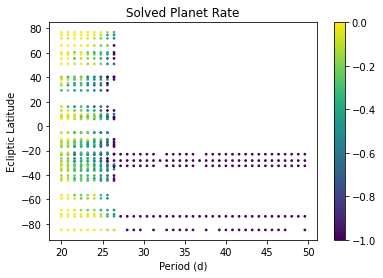

/var/folders/kk/_9cq7r5j5nd8cxryt5p59v2c0000gn/T/ipykernel_79530/1031028615.py:10: RuntimeWarning: divide by zero encountered in log10
  plt.scatter(temp.period, temp.ec_lat, c=np.log10(temp.flag.count_duo.values), s=3)


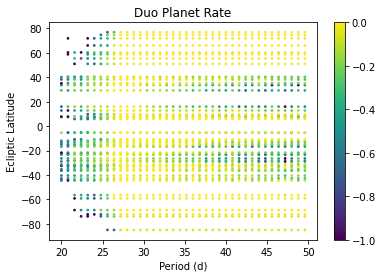

/var/folders/kk/_9cq7r5j5nd8cxryt5p59v2c0000gn/T/ipykernel_79530/1031028615.py:17: RuntimeWarning: divide by zero encountered in log10
  plt.scatter(temp.period, temp.ec_lat, c=np.log10(temp.flag.count_mono.values), s=3)


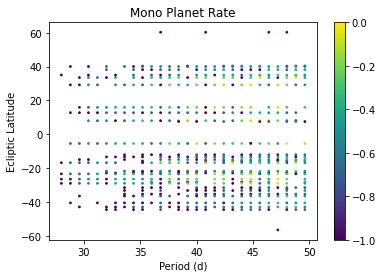

/var/folders/kk/_9cq7r5j5nd8cxryt5p59v2c0000gn/T/ipykernel_79530/1031028615.py:24: RuntimeWarning: divide by zero encountered in log10
  plt.scatter(temp.period, temp.ec_lat, c=np.log10(temp.flag.count_missed.values), s=3)


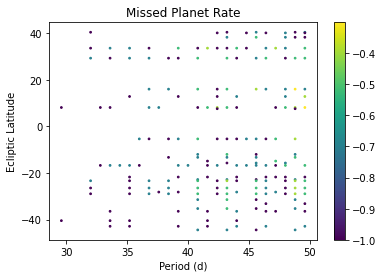

In [242]:
# plots
# temp.flag.values
# temp.ec_long.values
plt.scatter(temp.period, temp.ec_lat, c=np.log10(temp.flag.count_solved.values), s=3)
plt.colorbar()
plt.xlabel('Period (d)')
plt.ylabel('Ecliptic Latitude')
plt.title('Solved Planet Rate')
plt.show()

plt.scatter(temp.period, temp.ec_lat, c=np.log10(temp.flag.count_duo.values), s=3)
plt.colorbar()
plt.xlabel('Period (d)')
plt.ylabel('Ecliptic Latitude')
plt.title('Duo Planet Rate')
plt.show()

plt.scatter(temp.period, temp.ec_lat, c=np.log10(temp.flag.count_mono.values), s=3)
plt.colorbar()
plt.xlabel('Period (d)')
plt.ylabel('Ecliptic Latitude')
plt.title('Mono Planet Rate')
plt.show()

plt.scatter(temp.period, temp.ec_lat, c=np.log10(temp.flag.count_missed.values), s=3)
plt.colorbar()
plt.xlabel('Period (d)')
plt.ylabel('Ecliptic Latitude')
plt.title('Missed Planet Rate')
plt.show()

/var/folders/kk/_9cq7r5j5nd8cxryt5p59v2c0000gn/T/ipykernel_79530/2510253548.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


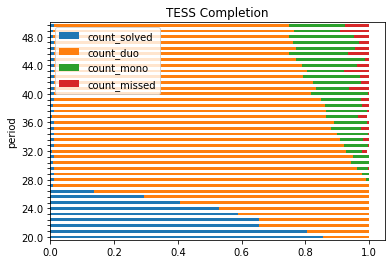

In [354]:
# make a stacked bar chart by period
# agg the data
bar_df = temp.groupby(['period'], as_index=False).agg({
                        'count_solved': 'mean',
                        'count_duo': 'mean',
                        'count_mono': 'mean',
                        'count_missed': 'mean',})#.reset_index()#.droplevel(level=0)#.reset_index()
                        #  'd': lambda x: x.max() - x.min()})

# plot
fig, ax = plt.subplots()
ax = bar_df.plot( 
    ax=ax,
    x = 'period', 
    kind = 'barh', 
    stacked = True, 
    title = 'TESS Completion', 
    # mark_right = False, 
    )

# [f(x) if condition else g(x) for x in sequence]
# period_labels = [np.round(periods, 2)[i] if (i%5==0) else ('') for i in range(len(periods))]
period_labels = [p if (p%2==0) else ('') for p in np.round(periods, 2)]
ax.set_yticklabels(period_labels)
fig.show()

In [394]:
# need to figure out what's happening with the things that are getting flagged as duo transits but have no aliases
# do some plotting of individual systems.
row = rdf[(rdf.flag==2) & (rdf.num_aliases==0)].iloc[22]

row
# plt.scatter(rdf[rdf.flag==2].period, rdf[rdf.flag==2].num_aliases, alpha=.1)
# plt.yscale('log')

TIC            3.765400e+08
ec_long        8.752625e+01
ec_lat         5.092898e+01
period         2.640000e+01
tc_phase       6.000000e-01
num_aliases    0.000000e+00
flag           2.000000e+00
Name: 86, dtype: float64

**NOTE: Currently, some aliases are not getting ruled out properly and planets that should be marked as "solved" are getting marked as "duo". It appears to happen when two adjacent transits are caught in adjacent sectors. This is likely because rule_out_aliases only uses sectors with non-detections as secondary_times to rule things out. Look into a reliable way to fix this.**

26.400000000000006
[26.4 13.2]
[False False]


/var/folders/kk/_9cq7r5j5nd8cxryt5p59v2c0000gn/T/ipykernel_79530/449271651.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


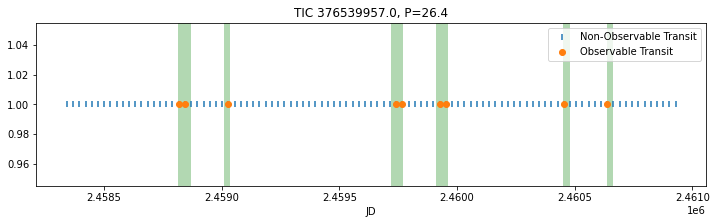

In [417]:
period = row.period
tc_phase = row.tc_phase
tic = row.TIC
sec = np.array(tdf.loc[tdf.TIC==tic, 'sec'].values[0])
sector_times = midtimes[sec-1]     # sectors are indexed from 1, midtimes from -

# calculate transit times in the relevant window
transit_times = calc_transit_times_phase(period, tc_phase, dur=2)
trans_obs, sec_obs = check_observability(transit_times, sector_times)

observed_transit = transit_times[trans_obs][0]
n_a, aliases = find_all_aliases(transit_times, sector_times, trans_obs, sec_obs)
# see what is ruled out by the empty sectors
ruled_out = rule_out_aliases(aliases, observed_transit, sector_times[~sec_obs])

# print(sum(trans_obs), sum(sec_obs))
print(period)
print(aliases)
print(ruled_out)

plot_transits()

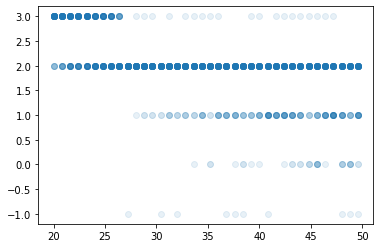

In [154]:
plt.scatter(rdf.period, rdf.flag, alpha=.1)

83.1993941811405 0.15601864044243652
Still ambiguous!


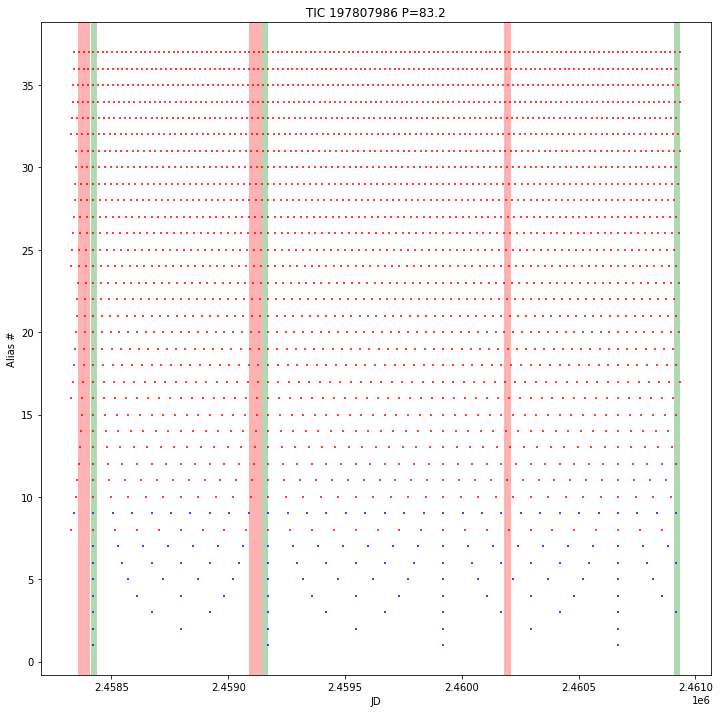

In [208]:
# get the params for that planet
j1 = 2
j2 = 0
period = periods[j1]
tc_phase = tc_phases[j2]
print(period, tc_phase)

# for that location
k = 0
tic = mini.iloc[k]['TIC']
sec = np.array(mini.iloc[k]['sec'])
sector_times = midtimes[sec-1]     # sectors are indexed from 1, midtimes from -

# calculate transit times in the relevant window
transit_times = calc_transit_times_phase(period, tc_phase, dur=2)
trans_obs, sec_obs = check_observability(transit_times, sector_times)

# find all the aliases
num_transits_observed = len(transit_times[trans_obs])

if num_transits_observed == 0:
    print("No transits captured")
    flag = 0
    plot_transits()
elif num_transits_observed == 1:
    print("Mono-transit")
    flag = 1
    plot_transits()
else:
    observed_transit = transit_times[trans_obs][0]
    n_a, aliases = find_all_aliases(transit_times, sector_times, trans_obs, sec_obs)

    # see what is ruled out by the empty sectors
    ruled_out = rule_out_aliases(aliases, observed_transit, sector_times[~sec_obs])
    # ruled_out = rule_out_aliases(aliases, transit_times[trans_obs][0], [2458530.256944, 2458540.256944])

    # print the status
    if sum(aliases[~ruled_out]) > 1 :
        print("Still ambiguous!")
        flag = 2
    elif sum(aliases[~ruled_out]) == 1 :
        print('Sovled!')
        flag = 3
    else:
        print("Something went wrong")
    plot_aliases()

In [154]:
def generage_flag(transit_times, trans_obs):
    """
    0 - No transits observed
    1 - Mono-transit
    2 - Duo+ transit, but unresolve aliases remaining
    3 - Solved
    """
    ...

5 55


Still ambiguous!


In [ ]:
def alias_flag(aliases, ruled_out):
    """Returns the number of remaining aliases"""

(0.0, 2.0)

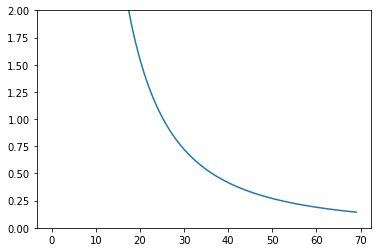

In [ ]:
plt.plot(aliases[:-1] - aliases[1:])
plt.ylim([0,2])

In [ ]:

print("Sector start times: ", sector_times)

stop_time = np.max(sector_times) + 27
transits = calc_transit_times(period, tc, stop_time=stop_time)
print("Transit times: ", transits)

observability = check_observability(transits, sector_times)
print("Observable? ", observability)
print("Observed Transits: ", transits[observability])

aliases = find_aliases(transits, observability)
print("Aliases: ", aliases)

# what happens if we add in one more sector?
new_sectors = np.array([0, 1, 7, 8, 13, 14, 15, 16]) * 27
new_stop = np.max(new_sectors) + 27
print(new_stop)
new_transits = calc_transit_times(period, tc, stop_time=new_stop)
new_obs = check_observability(new_transits, new_sectors)
new_aliases = find_aliases(new_transits, new_obs)

print('')
print("Observed Transits: ", new_transits[new_obs])
print("Observable? ", new_obs)
print("Aliases: ", new_aliases)
print('Delta N: ', (len(aliases) - len(new_aliases)) / len(aliases))

In [29]:
data = transits[observability]
max_alias = np.min(data[1:] - data[:-1])
max_alias / np.arange(1,10)

per / 10 >= n

array([50.        , 25.        , 16.66666667, 12.5       , 10.        ,
        8.33333333,  7.14285714,  6.25      ,  5.55555556])

[True, False, False, False, True, False, False, False, False, False, False]

In [ ]:
# set t = 0 to be the start date of TESS
sec_length = 28




